# Make MDP using all states

In [35]:
import pandas as pd
import numpy as np

df_all = pd.read_pickle('../processed_data/all_data.pkl')

states = ['chapter', 'section', 'mcr',
       'previous_remediation_recvd', 'total_rem_cnt', 'active_rem_count',
       'passive_rem_count', 'constructive_rem_count',
       'current_recall_q_miss_count', 'time_duration_previous_remediation',
       'ave_time_duration_all_previous_remediations',
       'ave_time_duration_all_previous_remediations_passive',
       'ave_time_duration_all_previous_remediations_active',
       'ave_time_duration_all_previous_remediations_constructive',
       'time_duration_most_recent_missed_recall_question',
       'ave_time_duration_all_missed_recall_questions_so_far',
       'time_duration_previous_correct_recall_question',
       'ave_time_duration_all_correct_recall_questions_so_far',
       'norm_time_duration_video', 'avg_norm_time_duration_all_videos_so_far',
       'feedback_type', 'feedback_duration', 'non_rem_count',
       'num_recall_qs_missed', 'sex_f', 'sex_m', 'age', 'education',
       'coin_familiarity', 'coin_interest', 'pretest']

df = pd.DataFrame(columns=['username', 'episode_id', 'transition_id', 'state', 'action', 'next_state', 'reward', 'delayed_reward', 'delayed_reward_high_low', 'done'])


episode_id = -1
transition_id = 0
username = "-1"
seen = set()
for i, row in df_all.iterrows():
    if row['username']!=username:
        transition_id = 0
        episode_id += 1
        username = row['username']
        if username in seen:
            print("SAME USERNAME", username)
        seen.add(username)
        
        if i>0:
            df.at[i-1, 'done'] = True
            df.at[i-1, 'next_state'] = np.array([-1] * len(state))
            df.at[i-1, 'delayed_reward'] = nlg
            df.at[i-1, 'delayed_reward_high_low'] = nlg_high_low
        skip_ns = True
    
    state = np.array(row[states].tolist())
    if skip_ns is False:
        df.at[i-1, 'next_state'] = state
    else:
        skip_ns = False
    
    
    df = df.append({'username': username, 'episode_id': episode_id, 'transition_id': transition_id, 
                    'state':state, 'action': row['action'], 'next_state':None, 'reward':None, 
                    'delayed_reward': 0, 'delayed_reward_high_low': 0, 'done': False}, ignore_index=True)
    
    nlg = row['nlg']
    nlg_high_low = row['nlg_high_low']
    
    transition_id += 1

df.at[len(df)-1, 'done'] = True
df.at[len(df)-1, 'next_state'] = np.array([-1] * len(state))
df.at[len(df)-1, 'delayed_reward'] = nlg
df.at[len(df)-1, 'delayed_reward_high_low'] = nlg_high_low

df = df.sort_values(['episode_id', 'transition_id'])

print("STATES (" + str(len(states)) + "):", states)
df

STATES (31): ['chapter', 'section', 'mcr', 'previous_remediation_recvd', 'total_rem_cnt', 'active_rem_count', 'passive_rem_count', 'constructive_rem_count', 'current_recall_q_miss_count', 'time_duration_previous_remediation', 'ave_time_duration_all_previous_remediations', 'ave_time_duration_all_previous_remediations_passive', 'ave_time_duration_all_previous_remediations_active', 'ave_time_duration_all_previous_remediations_constructive', 'time_duration_most_recent_missed_recall_question', 'ave_time_duration_all_missed_recall_questions_so_far', 'time_duration_previous_correct_recall_question', 'ave_time_duration_all_correct_recall_questions_so_far', 'norm_time_duration_video', 'avg_norm_time_duration_all_videos_so_far', 'feedback_type', 'feedback_duration', 'non_rem_count', 'num_recall_qs_missed', 'sex_f', 'sex_m', 'age', 'education', 'coin_familiarity', 'coin_interest', 'pretest']


,username,episode_id,transition_id,state,action,next_state,reward,delayed_reward,delayed_reward_high_low,done
0,12-B-40,0,0,"[1.0, 2.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,"[1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",None,0,0,False
1,12-B-40,0,1,"[1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",2,"[1.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, ...",None,0,0,False
2,12-B-40,0,2,"[1.0, 2.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, ...",0,"[1.0, 2.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 3.0, ...",None,0,0,False
3,12-B-40,0,3,"[1.0, 2.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 3.0, ...",3,"[1.0, 2.0, 0.0, 3.0, 4.0, 2.0, 0.0, 1.0, 4.0, ...",None,0,0,False
4,12-B-40,0,4,"[1.0, 2.0, 0.0, 3.0, 4.0, 2.0, 0.0, 1.0, 4.0, ...",3,"[1.0, 2.0, 0.0, 3.0, 5.0, 2.0, 0.0, 2.0, 5.0, ...",None,0,0,False
...,...,...,...,...,...,...,...,...,...,...
4993,10-A-18,486,4,"[1.0, 5.0, 0.0, 3.0, 4.0, 0.0, 1.0, 3.0, 0.0, ...",2,"[2.0, 8.0, 0.0, 2.0, 5.0, 1.0, 1.0, 3.0, 0.0, ...",None,0,0,False
4994,10-A-18,486,5,"[2.0, 8.0, 0.0, 2.0, 5.0, 1.0, 1.0, 3.0, 0.0, ...",0,"[2.0, 8.0, 0.0, 0.0, 6.0, 1.0, 1.0, 3.0, 1.0, ...",None,0,0,False
4995,10-A-18,486,6,"[2.0, 8.0, 0.0, 0.0, 6.0, 1.0, 1.0, 3.0, 1.0, ...",3,"[3.0, 6.0, 0.0, 3.0, 7.0, 1.0, 1.0, 4.0, 0.0, ...",None,0,0,False
4996,10-A-18,486,7,"[3.0, 6.0, 0.0, 3.0, 7.0, 1.0, 1.0, 4.0, 0.0, ...",3,"[3.0, 8.0, 0.0, 3.0, 8.0, 1.0, 1.0, 5.0, 0.0, ...",None,0,0,False


In [36]:
df.to_pickle('../temp/df_all.pkl')

# MDP normalized with all states

In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df_all = pd.read_pickle('../processed_data/all_data.pkl')

states = ['chapter', 'section', 'mcr',
       'previous_remediation_recvd', 'total_rem_cnt', 'active_rem_count',
       'passive_rem_count', 'constructive_rem_count',
       'current_recall_q_miss_count', 'time_duration_previous_remediation',
       'ave_time_duration_all_previous_remediations',
       'ave_time_duration_all_previous_remediations_passive',
       'ave_time_duration_all_previous_remediations_active',
       'ave_time_duration_all_previous_remediations_constructive',
       'time_duration_most_recent_missed_recall_question',
       'ave_time_duration_all_missed_recall_questions_so_far',
       'time_duration_previous_correct_recall_question',
       'ave_time_duration_all_correct_recall_questions_so_far',
       'norm_time_duration_video', 'avg_norm_time_duration_all_videos_so_far',
       'feedback_type', 'feedback_duration', 'non_rem_count',
       'num_recall_qs_missed', 'sex_f', 'sex_m', 'age', 'education',
       'coin_familiarity', 'coin_interest', 'pretest']
df_states = df_all[states]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_states)
norm_states = pd.DataFrame(x_scaled, columns=states)
norm_states


df = pd.DataFrame(columns=['username', 'episode_id', 'transition_id', 'state', 'action', 'next_state', 'reward', 'delayed_reward', 'delayed_reward_high_low', 'done'])


episode_id = -1
transition_id = 0
username = "-1"
seen = set()
for i, row in df_all.iterrows():
    if row['username']!=username:
        transition_id = 0
        episode_id += 1
        username = row['username']
        if username in seen:
            print("SAME USERNAME", username)
        seen.add(username)
        
        if i>0:
            df.at[i-1, 'done'] = True
            df.at[i-1, 'next_state'] = np.array([-1] * len(state))
            df.at[i-1, 'delayed_reward'] = nlg
            df.at[i-1, 'delayed_reward_high_low'] = nlg_high_low
        skip_ns = True
    
    state = np.array(norm_states.loc[i, :].tolist())
    if skip_ns is False:
        df.at[i-1, 'next_state'] = state
    else:
        skip_ns = False
    
    
    df = df.append({'username': username, 'episode_id': episode_id, 'transition_id': transition_id, 
                    'state':state, 'action': row['action'], 'next_state':None, 'reward':None, 
                    'delayed_reward': 0, 'delayed_reward_high_low': 0, 'done': False}, ignore_index=True)
    
    nlg = row['nlg']
    nlg_high_low = row['nlg_high_low']
    
    transition_id += 1

df.at[len(df)-1, 'done'] = True
df.at[len(df)-1, 'next_state'] = np.array([-1] * len(state))
df.at[len(df)-1, 'delayed_reward'] = nlg
df.at[len(df)-1, 'delayed_reward_high_low'] = nlg_high_low

df = df.sort_values(['episode_id', 'transition_id'])

print("STATES (" + str(len(states)) + "):", states)
df

STATES (31): ['chapter', 'section', 'mcr', 'previous_remediation_recvd', 'total_rem_cnt', 'active_rem_count', 'passive_rem_count', 'constructive_rem_count', 'current_recall_q_miss_count', 'time_duration_previous_remediation', 'ave_time_duration_all_previous_remediations', 'ave_time_duration_all_previous_remediations_passive', 'ave_time_duration_all_previous_remediations_active', 'ave_time_duration_all_previous_remediations_constructive', 'time_duration_most_recent_missed_recall_question', 'ave_time_duration_all_missed_recall_questions_so_far', 'time_duration_previous_correct_recall_question', 'ave_time_duration_all_correct_recall_questions_so_far', 'norm_time_duration_video', 'avg_norm_time_duration_all_videos_so_far', 'feedback_type', 'feedback_duration', 'non_rem_count', 'num_recall_qs_missed', 'sex_f', 'sex_m', 'age', 'education', 'coin_familiarity', 'coin_interest', 'pretest']


,username,episode_id,transition_id,state,action,next_state,reward,delayed_reward,delayed_reward_high_low,done
0,12-B-40,0,0,"[0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0,...",2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.008928...",None,0,0,False
1,12-B-40,0,1,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.008928...",2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.017857...",None,0,0,False
2,12-B-40,0,2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.017857...",0,"[0.0, 0.14285714285714285, 0.0, 0.25, 0.026785...",None,0,0,False
3,12-B-40,0,3,"[0.0, 0.14285714285714285, 0.0, 0.25, 0.026785...",3,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0357142...",None,0,0,False
4,12-B-40,0,4,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0357142...",3,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0446428...",None,0,0,False
...,...,...,...,...,...,...,...,...,...,...
4993,10-A-18,486,4,"[0.0, 0.5714285714285714, 0.0, 1.0, 0.03571428...",2,"[0.3333333333333333, 1.0, 0.0, 0.75, 0.0446428...",None,0,0,False
4994,10-A-18,486,5,"[0.3333333333333333, 1.0, 0.0, 0.75, 0.0446428...",0,"[0.3333333333333333, 1.0, 0.0, 0.25, 0.0535714...",None,0,0,False
4995,10-A-18,486,6,"[0.3333333333333333, 1.0, 0.0, 0.25, 0.0535714...",3,"[0.6666666666666667, 0.7142857142857142, 0.0, ...",None,0,0,False
4996,10-A-18,486,7,"[0.6666666666666667, 0.7142857142857142, 0.0, ...",3,"[0.6666666666666667, 1.0, 0.0, 1.0, 0.07142857...",None,0,0,False


In [66]:
df.to_pickle('../temp/df_all_norm.pkl')

# MDP normalized with cluster

In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df_all = pd.read_pickle('../processed_data/all_data.pkl')

states = ['chapter', 'section', 'mcr',
       'previous_remediation_recvd', 'total_rem_cnt', 'active_rem_count',
       'passive_rem_count', 'constructive_rem_count',
       'current_recall_q_miss_count', 'time_duration_previous_remediation',
       'ave_time_duration_all_previous_remediations',
       'ave_time_duration_all_previous_remediations_passive',
       'ave_time_duration_all_previous_remediations_active',
       'ave_time_duration_all_previous_remediations_constructive',
       'time_duration_most_recent_missed_recall_question',
       'ave_time_duration_all_missed_recall_questions_so_far',
       'time_duration_previous_correct_recall_question',
       'ave_time_duration_all_correct_recall_questions_so_far',
       'norm_time_duration_video', 'avg_norm_time_duration_all_videos_so_far',
       'feedback_type', 'feedback_duration', 'non_rem_count',
       'num_recall_qs_missed', 'sex_f', 'sex_m', 'age', 'education',
       'coin_familiarity', 'coin_interest', 'pretest']
df_states = df_all[states]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_states)
norm_states = pd.DataFrame(x_scaled, columns=states)
norm_states


df = pd.DataFrame(columns=['username', 'episode_id', 'transition_id', 'state', 'action', 'next_state', 'reward', 'delayed_reward', 'delayed_reward_high_low', 'done'])


episode_id = -1
transition_id = 0
username = "-1"
seen = set()
for i, row in df_all.iterrows():
    if row['username']!=username:
        transition_id = 0
        episode_id += 1
        username = row['username']
        if username in seen:
            print("SAME USERNAME", username)
        seen.add(username)
        
        if i>0:
            df.at[i-1, 'done'] = True
            df.at[i-1, 'next_state'] = np.array([-1] * len(state))
            df.at[i-1, 'delayed_reward'] = nlg
            df.at[i-1, 'delayed_reward_high_low'] = nlg_high_low
        skip_ns = True
    
    state = np.array(norm_states.loc[i, :].tolist())
    if skip_ns is False:
        df.at[i-1, 'next_state'] = state
    else:
        skip_ns = False
    
    
    df = df.append({'username': username, 'episode_id': episode_id, 'transition_id': transition_id, 
                    'state':state, 'action': row['action'], 'next_state':None, 'reward':None, 
                    'delayed_reward': 0, 'delayed_reward_high_low': 0, 'done': False}, ignore_index=True)
    
    nlg = row['nlg']
    nlg_high_low = row['nlg_high_low']
    
    transition_id += 1

df.at[len(df)-1, 'done'] = True
df.at[len(df)-1, 'next_state'] = np.array([-1] * len(state))
df.at[len(df)-1, 'delayed_reward'] = nlg
df.at[len(df)-1, 'delayed_reward_high_low'] = nlg_high_low

df = df.sort_values(['episode_id', 'transition_id'])

print("STATES (" + str(len(states)) + "):", states)
df



STATES (31): ['chapter', 'section', 'mcr', 'previous_remediation_recvd', 'total_rem_cnt', 'active_rem_count', 'passive_rem_count', 'constructive_rem_count', 'current_recall_q_miss_count', 'time_duration_previous_remediation', 'ave_time_duration_all_previous_remediations', 'ave_time_duration_all_previous_remediations_passive', 'ave_time_duration_all_previous_remediations_active', 'ave_time_duration_all_previous_remediations_constructive', 'time_duration_most_recent_missed_recall_question', 'ave_time_duration_all_missed_recall_questions_so_far', 'time_duration_previous_correct_recall_question', 'ave_time_duration_all_correct_recall_questions_so_far', 'norm_time_duration_video', 'avg_norm_time_duration_all_videos_so_far', 'feedback_type', 'feedback_duration', 'non_rem_count', 'num_recall_qs_missed', 'sex_f', 'sex_m', 'age', 'education', 'coin_familiarity', 'coin_interest', 'pretest']


,username,episode_id,transition_id,state,action,next_state,reward,delayed_reward,delayed_reward_high_low,done
0,12-B-40,0,0,"[0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0,...",2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.008928...",None,0,0,False
1,12-B-40,0,1,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.008928...",2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.017857...",None,0,0,False
2,12-B-40,0,2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.017857...",0,"[0.0, 0.14285714285714285, 0.0, 0.25, 0.026785...",None,0,0,False
3,12-B-40,0,3,"[0.0, 0.14285714285714285, 0.0, 0.25, 0.026785...",3,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0357142...",None,0,0,False
4,12-B-40,0,4,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0357142...",3,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0446428...",None,0,0,False
...,...,...,...,...,...,...,...,...,...,...
4993,10-A-18,486,4,"[0.0, 0.5714285714285714, 0.0, 1.0, 0.03571428...",2,"[0.3333333333333333, 1.0, 0.0, 0.75, 0.0446428...",None,0,0,False
4994,10-A-18,486,5,"[0.3333333333333333, 1.0, 0.0, 0.75, 0.0446428...",0,"[0.3333333333333333, 1.0, 0.0, 0.25, 0.0535714...",None,0,0,False
4995,10-A-18,486,6,"[0.3333333333333333, 1.0, 0.0, 0.25, 0.0535714...",3,"[0.6666666666666667, 0.7142857142857142, 0.0, ...",None,0,0,False
4996,10-A-18,486,7,"[0.6666666666666667, 0.7142857142857142, 0.0, ...",3,"[0.6666666666666667, 1.0, 0.0, 1.0, 0.07142857...",None,0,0,False


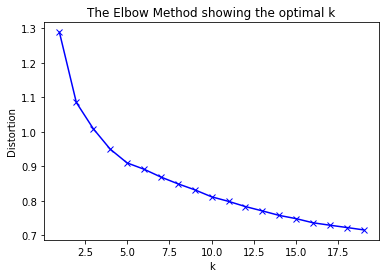

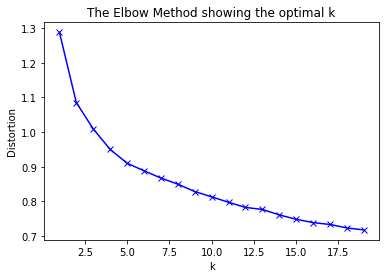

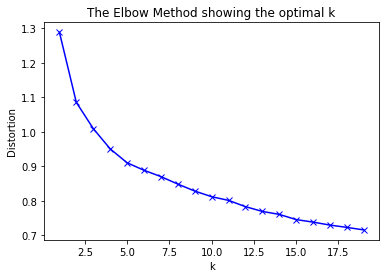

In [120]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

X = np.array(df['state'].tolist())
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


X = np.array(df['state'].tolist())
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



X = np.array(df['state'].tolist())
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=2).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [121]:
clf = KMeans(n_clusters=5, random_state=0)
kmeans_state = clf.fit_transform(df['state'].tolist())

kmeans_next_state = clf.transform(df['next_state'].tolist())

df['cluster'] = -1
df['ns_cluster'] = -1
for i, row in df.iterrows():
    df.loc[i, 'cluster'] = np.argmin(kmeans_state[i])
    df.loc[i, 'ns_cluster'] = np.argmin(kmeans_next_state[i])
    
df

,username,episode_id,transition_id,state,action,next_state,reward,delayed_reward,delayed_reward_high_low,done,cluster,ns_cluster,action_proba,ns_act_0_proba,ns_act_1_proba,ns_act_2_proba,ns_act_3_proba
0,12-B-40,0,0,"[0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0,...",2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.008928...",None,0,0,False,0,0,0.40,0.09,0.08,0.40,0.42
1,12-B-40,0,1,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.008928...",2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.017857...",None,0,0,False,0,0,0.40,0.09,0.08,0.40,0.42
2,12-B-40,0,2,"[0.0, 0.14285714285714285, 0.0, 0.75, 0.017857...",0,"[0.0, 0.14285714285714285, 0.0, 0.25, 0.026785...",None,0,0,False,0,0,0.09,0.09,0.08,0.40,0.42
3,12-B-40,0,3,"[0.0, 0.14285714285714285, 0.0, 0.25, 0.026785...",3,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0357142...",None,0,0,False,0,0,0.42,0.09,0.08,0.40,0.42
4,12-B-40,0,4,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0357142...",3,"[0.0, 0.14285714285714285, 0.0, 1.0, 0.0446428...",None,0,0,False,0,0,0.42,0.09,0.08,0.40,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,10-A-18,486,4,"[0.0, 0.5714285714285714, 0.0, 1.0, 0.03571428...",2,"[0.3333333333333333, 1.0, 0.0, 0.75, 0.0446428...",None,0,0,False,0,0,0.40,0.09,0.08,0.40,0.42
4994,10-A-18,486,5,"[0.3333333333333333, 1.0, 0.0, 0.75, 0.0446428...",0,"[0.3333333333333333, 1.0, 0.0, 0.25, 0.0535714...",None,0,0,False,0,0,0.09,0.09,0.08,0.40,0.42
4995,10-A-18,486,6,"[0.3333333333333333, 1.0, 0.0, 0.25, 0.0535714...",3,"[0.6666666666666667, 0.7142857142857142, 0.0, ...",None,0,0,False,0,0,0.42,0.09,0.08,0.40,0.42
4996,10-A-18,486,7,"[0.6666666666666667, 0.7142857142857142, 0.0, ...",3,"[0.6666666666666667, 1.0, 0.0, 1.0, 0.07142857...",None,0,0,False,0,0,0.42,0.09,0.08,0.40,0.42


In [122]:
total_per_cluster = df.groupby(['cluster']).count()['episode_id'].tolist()
print("Count per clusters:", total_per_cluster)
df.to_pickle('../temp/df_all_norm_cluster.pkl')

Count per clusters: [1418, 1608, 536, 779, 657]
